In [1]:
# Esto es solo para poder debugear.
#!pip install torch tqdm
import torch
import numpy as np
import tqdm

# Genera una semilla fija para que los experimentos sea repetibles.
t_cg = torch.manual_seed(1547)

### NUMPY

In [2]:
x = np.array([[1, 2,3, 4]],dtype = np.float32)
y = np.array([2, 4,6,8], dtype = np.float32)

def forward(x):
  return x * w
def loss(y_pred, y):
  return np.mean(((y_pred - y)**2))

def grad(y_pred,y):
  return (x* 2 * ((y_pred) - y)).mean()

In [3]:
w= 0.0
lr =0.05
for e in range(10):
  y_pred = forward(x)
  loss_i = loss(y_pred,y)
  grad_i = grad(y_pred,y)
  w -= lr*grad_i
  print(loss_i, w)

print(forward(x = 5))


30.0 1.5
1.875 1.875
0.1171875 1.96875
0.0073242188 1.9921875
0.00045776367 1.998046875
2.861023e-05 1.99951171875
1.7881393e-06 1.9998779296875
1.1175871e-07 1.999969482421875
6.9849193e-09 1.9999923706054688
4.3655746e-10 1.9999980926513672
9.999990463256836


### TORCH METHOD 1

In [4]:
x = torch.tensor([1,2,3, 4],dtype = torch.float32, requires_grad = False)
y = torch.tensor([2,4,6,8], dtype = torch.float32, requires_grad = False)
w = torch.tensor(0.0,dtype = torch.float32, requires_grad = True)


def forward(x):
  return w *  x
def loss(y_pred, y):
  return ((y_pred - y)**2).mean()


In [5]:
lr =0.01
for e in tqdm.tqdm(range(50)):
  y_pred = forward(x)
  l  = loss(y_pred, y)
  l.backward()

  with torch.no_grad():
    w -= lr * w.grad
  w.grad.zero_()

  if e % 10 == 0:
    print(f"epoch : {e}")
    print(f"loss : {l.item():.3f}")
    print(f"w : {w.item():.3f}")

print(forward(x = 5).item())

100%|██████████| 50/50 [00:00<00:00, 1786.12it/s]

epoch : 0
loss : 30.000
w : 0.300
epoch : 10
loss : 1.163
w : 1.665
epoch : 20
loss : 0.045
w : 1.934
epoch : 30
loss : 0.002
w : 1.987
epoch : 40
loss : 0.000
w : 1.997
9.997042655944824


### TORCH METHOD 2

In [6]:
import torch.nn as nn
x = torch.tensor([1,2,3, 4],dtype = torch.float32, requires_grad = False)
y = torch.tensor([2,4,6,8], dtype = torch.float32, requires_grad = False)
w = torch.tensor(0.0,dtype = torch.float32, requires_grad = True)

#otra forma seria : instanciar clase que devuelve objeto MSEloss
# loss = nn.MSELoss(size_average=None, reduce=None, reduction='mean')

def forward(x):
  return x * w


In [7]:
lr =0.01
for e in tqdm.tqdm(range(50)):
  y_pred = forward(x)
  # simula la funcion de loss implementada a mano antes

  # Metodo 1: instanciando clase de error
  # l = loss(input = y_pred, target = y)

  # Metodo 2 : simulan la funcion de loss implementada a mano antes mediante una funcion de error built in de torch:
  l  = nn.functional.mse_loss(input = y_pred, target = y, size_average=None, reduce=None, reduction='mean')
  l.backward()

  with torch.no_grad():
    w -= lr * w.grad
  w.grad.zero_()

  if e % 10 == 0:
    print(f"epoch : {e}")
    print(f"loss : {l.item():.3f}")
    print(f"w : {w.item():.3f}")

print(forward(x = 5).item())

100%|██████████| 50/50 [00:00<00:00, 3845.37it/s]

epoch : 0
loss : 30.000
w : 0.300
epoch : 10
loss : 1.163
w : 1.665
epoch : 20
loss : 0.045
w : 1.934
epoch : 30
loss : 0.002
w : 1.987
epoch : 40
loss : 0.000
w : 1.997
9.997042655944824


### TORCH METHOD 3

In [8]:
import torch.nn as nn

x = torch.tensor([1,2,3, 4],dtype = torch.float32, requires_grad = False)
y = torch.tensor([2,4,6,8], dtype = torch.float32, requires_grad = False)
w = torch.tensor(0.0,dtype = torch.float32, requires_grad = True)

# loss class
loss = nn.MSELoss(size_average=None, reduce=None, reduction='mean')

# crea optimizer para prescendir d actualizacion de pesos a mano
optimizer = torch.optim.SGD(params = [w], lr=0.01)

def forward(x):
  return x * w


In [9]:
for epoch in tqdm.tqdm(range(50)):
  # forward
  y_pred = forward(x)

  # compute loss for all the batch
  l   = loss(input = y_pred, target = y)

  # compute the gradients for each w_i : dloss/dw_i (usa grafo computacional y almacena ,en el tensor .grad asociado a cada parametro, el valor del gradiente que luego usa el algoritmo de optimizacion)
  l.backward()

  # paso del optimizer (en este caso un simple SGD) equivale a lo que haciamos a mano de w += -lr*w.grad
  optimizer.step()

  if epoch % 10 == 0:
    print(f"epoch : {epoch}")
    print(f"loss : {l.item():.3f}")
    print(f"w : {w.item():.3f}")
  optimizer.zero_grad()

print(forward(x = 5).item())

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:00<00:00, 543.47it/s]

epoch : 0
loss : 30.000
w : 0.300
epoch : 10
loss : 1.163
w : 1.665
epoch : 20
loss : 0.045
w : 1.934
epoch : 30
loss : 0.002
w : 1.987
epoch : 40
loss : 0.000
w : 1.997
9.997042655944824


### TORCH METHOD 4

In [64]:
import torch.nn as nn

x = torch.tensor([[1],[2],[3], [4]],dtype = torch.float32, requires_grad = False)
y = torch.tensor([[2],[4],[6],[8]], dtype = torch.float32, requires_grad = False)

# Dimension layers (in and out, entra 4 samples (batch) sale 1 output por cada input) teniendo en cuenta el batch: X_input(1,4) * W(4,1)--> (1,1) // sin batch : X_input(1) * W(1)--> (1)
batch_size , features  = x.shape
# features == dim_input y en este caso features ==  dim_output pq capa solo 1 parametro (como que solo una neurona)

# model [capa lineal inicializa un tensor paramters asociado a la capa en funcion de las input y output dimesnions especificadas ]: capa lineal con 1 W y 1 X input (escalares) ; luego dim_input = 1 y dim_output = 1
model = nn.Linear(in_features= 1, out_features = 1)

# loss class
loss = nn.MSELoss(size_average=None, reduce=None, reduction='mean')

# crea optimizer para prescendir de actualizacion de pesos a mano
optimizer = torch.optim.SGD(params = model.parameters(), lr=0.01)

def forward(x):
  return x * w


In [65]:
for epoch in tqdm.tqdm(range(50)):
  # forward now is == to calling the model
  y_pred = model(x)

  # compute loss for all the batch
  l   = loss(input = y_pred, target = y)

  # compute the gradients for each w_i : dloss/dw_i (usa grafo computacional y almacena ,en el tensor .grad asociado a cada parametro, el valor del gradiente que luego usa el algoritmo de optimizacion)
  l.backward()

  # paso del optimizer (en este caso un simple SGD) equivale a lo que haciamos a mano de w += -lr*w.grad
  optimizer.step()

  if epoch % 10 == 0:
    print(f"epoch : {epoch}")
    print(f"loss : {l.item():.3f}")
  optimizer.zero_grad()

print(forward(x = 5).item())

  0%|          | 0/50 [00:00<?, ?it/s]

epoch : 0
loss : 21.203


AttributeError: 'Linear' object has no attribute 'get_parameters'

### TORCH METHOD 5  : custom module + dataset

In [143]:
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# data samples
x_numpy , y_numpy = datasets.make_regression(n_samples =100, n_features= 1, noise =20, random_state = 1)
x_numpy_std  = (x_numpy - np.mean(x_numpy)) / np.std(x_numpy)
y_numpy_std = (y_numpy - np.mean(y_numpy)) / np.std(y_numpy)
print(x_numpy.shape, y_numpy.shape)
print(x_numpy_std.shape, y_numpy_std.shape)

# to torch tensor
x = torch.from_numpy(x_numpy_std.astype(np.float32))
y = torch.from_numpy(y_numpy_std.astype(np.float32))
print(x.shape, y.shape)
# reshape y from (100) tensor -> (100,1) tensor
y = y.view(y.shape[0],1)
print(x.shape, y.shape)
print(f"Media de target y : {y.mean(dim = 0).item():.3f}")
print(f"Media de target y std: {y.mean(dim = 0).item():.3f}")

# numbeer of samples and number of features
# x (100,1)
n_samples = x.shape[0]
features = x.shape[1]

# custom class model (linear regression layer)
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size) -> None:
       super().__init__()
       self.in_size = input_size
       self.out_size = output_size
       # model [capa lineal inicializa un tensor paramters asociado a la capa en funcion de las input y output dimesnions especificadas ]: capa lineal con 1 W y 1 X input (escalares) ; luego dim_input = 1 y dim_output = 1
       self.linear = nn.Linear(in_features= self.in_size, out_features = self.out_size, bias = True)
    def forward(self,x):
        return self.linear(x)
    

# instanciar capa y crear modelo
model = LinearRegression(input_size = features, output_size = features)
# loss class
loss = nn.MSELoss(reduction='mean')
# crea optimizer para prescendir de actualizacion de pesos a mano
optimizer = torch.optim.SGD(params = model.parameters(), lr=0.01)

# MODULE CLASS DOCU:
"""nn.Module :
Base class for all neural network modules.

Your models should also subclass this class.

Modules can also contain other Modules, allowing to nest them in a tree structure. You can assign the submodules as regular attributes: 
self.sub_module = nn.Linear(...)"""

# Iterate along all de modules inside a network class or model class. Notice that LinearRegression module has inside a linear layer "module" or only linear layer
# note that the atribute name : self.linear will define the string "linear" to refer to that layer inside a module
# this will be useful when ,inside a class module, there are several layers
print("\n")

for m in model.modules():
    print(f"\nModule : {m}")

# iterate along all the parameters inside a module ( a module can have a lot of layers with their parameters)
for p in model.named_parameters(prefix='', recurse=True, remove_duplicate=True):
    print(f"\nParameter : {p}")

(100, 1) (100,)
(100, 1) (100,)
torch.Size([100, 1]) torch.Size([100])
torch.Size([100, 1]) torch.Size([100, 1])
Media de target y : -0.000
Media de target y std: -0.000



Module : LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

Module : Linear(in_features=1, out_features=1, bias=True)

Parameter : ('linear.weight', Parameter containing:
tensor([[0.9165]], requires_grad=True))

Parameter : ('linear.bias', Parameter containing:
tensor([-0.5463], requires_grad=True))


100%|██████████| 50/50 [00:00<00:00, 1515.34it/s]

epoch : 0
loss : 0.360
w : 0.918
Predictions :tensor([[4.5543],
        [5.5050]])


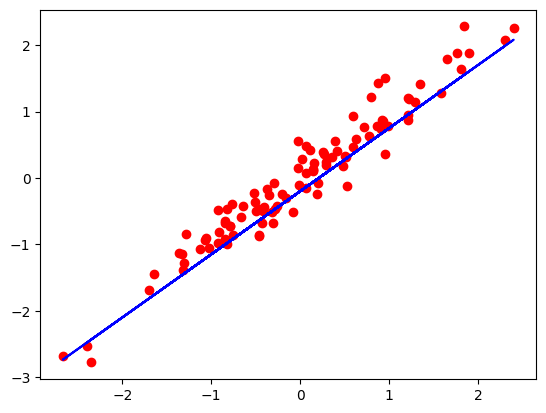

In [144]:
epochs = 50
for epoch in tqdm.tqdm(range(epochs)):
    
  # forward now is == to calling the model
  y_pred = model(x)

  # compute loss for all the batch
  l   = loss(input = y_pred, target = y)

  # compute the gradients for each w_i : dloss/dw_i (usa grafo computacional y almacena ,en el tensor .grad asociado a cada parametro, el valor del gradiente que luego usa el algoritmo de optimizacion)
  l.backward()

  # paso del optimizer (en este caso un simple SGD) equivale a lo que haciamos a mano de w += -lr*w.grad
  optimizer.step()
  
  # restore or eliminate the grads inside parameter.grad tensor for next iteration
  optimizer.zero_grad()

  if epoch % 50 == 0:
    print(f"epoch : {epoch}")
    print(f"loss : {l.item():.3f}")
    print(f"w : {model.get_parameter(target = 'linear.weight').item():.3f}")

# try prediction 
# IMPORTANT TO DETACH 
prediction = model(x = torch.tensor([[5],[6]], dtype = torch.float32)).detach()
print(f"Predictions :{prediction}")

# plotting
y_pred_train = model(x = x).detach().numpy()
plt.plot(x_numpy_std, y_numpy_std, 'ro')
#plt.plot(x_numpy, y_numpy, 'yo')
plt.plot(x_numpy_std, y_pred_train, 'b')
plt.show()


### TORCH METHOD 6  : FFN MULTICLASS


In [147]:
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

# device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyperparameters 
input_size = 784 # 28x28 images
hidden_size = 100
num_clases = 10
num_epochs = 2
batch_size = 100
lr = 0.001

# MNIST
train_set = torchvision.datasets.MNIST(root = './data', train = True, transform =transforms.ToTensor() , download = True)
test_set = torchvision.datasets.MNIST(root = './data', train = False, transform =transforms.ToTensor() , download = True)

# MNIST dataloaders
train_loader = torch.utils.data.DataLoader(dataset = train_set, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_set, batch_size = batch_size, shuffle = False)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:03<00:00, 2618149.49it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 262009.05it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 1871203.49it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [174]:
print(train_set)
print(test_set)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [171]:
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# data samples shape

# custom class model (linear regression layer)
class NeuralNet(nn.Module):
    def __init__(self, input_size,hidden_size, num_classes) -> None:
       super().__init__()
       self.in_size = input_size
       self.hidden = hidden_size
       self.num_classes = num_classes
       
       # Arquitecture of FFN
       self.l_1 = nn.Linear(in_features= self.in_size, out_features = self.hidden, bias = True)
       self.Relu = nn.ReLU()
       self.l_2 = nn.Linear(in_features=  self.hidden, out_features = self.num_classes, bias = True)
       
    def forward(self,x):
        return self.l_2(self.Relu(self.l_1(x)))
    

# instanciar capa y crear modelo
model = NeuralNet(input_size =input_size ,hidden_size = hidden_size, num_classes = num_clases)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Cuda available: ",torch.cuda.is_available())
model.to(device)
# loss class
loss = nn.CrossEntropyLoss()
# crea optimizer para prescendir de actualizacion de pesos a mano
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08)

# MODULE CLASS DOCU:
"""nn.Module :
Base class for all neural network modules.

Your models should also subclass this class.

Modules can also contain other Modules, allowing to nest them in a tree structure. You can assign the submodules as regular attributes: 
self.sub_module = nn.Linear(...)"""

# Iterate along all de modules inside a network class or model class. Notice that LinearRegression module has inside a linear layer "module" or only linear layer
# note that the atribute name : self.linear will define the string "linear" to refer to that layer inside a module
# this will be useful when ,inside a class module, there are several layers
print("\n")

for m in model.modules():
    print(f"\nModule : {m}")

# iterate along all the parameters inside a module ( a module can have a lot of layers with their parameters)
for p in model.named_parameters(prefix='', recurse=True, remove_duplicate=True):
    #print(f"\nParameter : {p}")
    pass

Cuda available:  False



Module : NeuralNet(
  (l_1): Linear(in_features=784, out_features=100, bias=True)
  (Relu): ReLU()
  (l_2): Linear(in_features=100, out_features=10, bias=True)
)

Module : Linear(in_features=784, out_features=100, bias=True)

Module : ReLU()

Module : Linear(in_features=100, out_features=10, bias=True)


In [172]:
epochs = 10
for epoch in tqdm.tqdm(range(epochs)):
  for i ,(b_samples ,b_labels) in enumerate(train_loader):
    # (100,1,28,28) -> (100, 28*28)
    b_samples = b_samples.view(100,28*28).to(device)
    #print(b_samples.shape)
    # (100) -> (100,1)
    b_labels = b_labels.to(device)
    
    # forward now is == to calling the model
    
    y_pred = model(b_samples)
    #print(y_pred.shape) # (100,10)

    # compute loss for all the batch
    l   = loss(input = y_pred, target = b_labels) # b_labels debe ser (100) pq crossentropyloss en torch solo necesita el indice de la label no el vector de dimendion 10 entero tipo one hot

    # compute the gradients for each w_i : dloss/dw_i (usa grafo computacional y almacena ,en el tensor .grad asociado a cada parametro, el valor del gradiente que luego usa el algoritmo de optimizacion)
    l.backward()

    # paso del optimizer (en este caso un simple SGD) equivale a lo que haciamos a mano de w += -lr*w.grad
    optimizer.step()
    
    # restore or eliminate the grads inside parameter.grad tensor for next iteration
    optimizer.zero_grad()

  print(f"epoch : {epoch}")
  print(f"loss : {l.item():.3f}")


 10%|█         | 1/10 [00:13<02:00, 13.37s/it]

epoch : 0
loss : 0.270


 20%|██        | 2/10 [00:38<02:42, 20.30s/it]

epoch : 1
loss : 0.140


 30%|███       | 3/10 [00:52<02:01, 17.35s/it]

epoch : 2
loss : 0.167


 40%|████      | 4/10 [01:06<01:35, 15.95s/it]

epoch : 3
loss : 0.107


 50%|█████     | 5/10 [01:19<01:15, 15.05s/it]

epoch : 4
loss : 0.029


 60%|██████    | 6/10 [01:33<00:58, 14.55s/it]

epoch : 5
loss : 0.103


 70%|███████   | 7/10 [01:46<00:42, 14.26s/it]

epoch : 6
loss : 0.032


 80%|████████  | 8/10 [02:00<00:28, 14.17s/it]

epoch : 7
loss : 0.031


 90%|█████████ | 9/10 [02:14<00:14, 14.03s/it]

epoch : 8
loss : 0.028


100%|██████████| 10/10 [02:27<00:00, 14.80s/it]

epoch : 9
loss : 0.032


In [212]:
# Evaluation / metrics 
with torch.no_grad():
    accuracy = 0
    accuracy_2 = 0  
    samples = 0
    for i, (b_images,b_labels) in enumerate(test_loader):
        samples += 100
        b_images = b_images.view(100, 28*28)
        y_test_pred = model(b_images)
        
        # Segundo metodo accuracy
        _,pred_class_2 = torch.max(y_test_pred ,dim =  1)
        accuracy_2 += (pred_class_2 == b_labels).sum()
        
        # Primer metodo accurcy
        pred_class = y_test_pred.argmax(dim = 1)
        accuracy += torch.sum(pred_class == b_labels)
        print(f"Accuarcy 1 for iter/batch {i} : {torch.sum(pred_class == b_labels)}")
        print(f"Accuarcy 2 for iter/batch {i} : {(pred_class_2 == b_labels).sum()}")


    accuracy = accuracy / samples
    accuracy_2 = accuracy_2 / samples 
    print("Total accuracy 1 :", accuracy.item())
    print("Total accuracy 2:", accuracy_2.item())
        

Accuarcy 1 for iter/batch 0 : 99
Accuarcy 2 for iter/batch 0 : 99
Accuarcy 1 for iter/batch 1 : 97
Accuarcy 2 for iter/batch 1 : 97
Accuarcy 1 for iter/batch 2 : 97
Accuarcy 2 for iter/batch 2 : 97
Accuarcy 1 for iter/batch 3 : 97
Accuarcy 2 for iter/batch 3 : 97
Accuarcy 1 for iter/batch 4 : 97
Accuarcy 2 for iter/batch 4 : 97
Accuarcy 1 for iter/batch 5 : 99
Accuarcy 2 for iter/batch 5 : 99
Accuarcy 1 for iter/batch 6 : 96
Accuarcy 2 for iter/batch 6 : 96
Accuarcy 1 for iter/batch 7 : 96
Accuarcy 2 for iter/batch 7 : 96
Accuarcy 1 for iter/batch 8 : 98
Accuarcy 2 for iter/batch 8 : 98
Accuarcy 1 for iter/batch 9 : 96
Accuarcy 2 for iter/batch 9 : 96
Accuarcy 1 for iter/batch 10 : 96
Accuarcy 2 for iter/batch 10 : 96
Accuarcy 1 for iter/batch 11 : 94
Accuarcy 2 for iter/batch 11 : 94
Accuarcy 1 for iter/batch 12 : 93
Accuarcy 2 for iter/batch 12 : 93
Accuarcy 1 for iter/batch 13 : 97
Accuarcy 2 for iter/batch 13 : 97
Accuarcy 1 for iter/batch 14 : 100
Accuarcy 2 for iter/batch 14 : 10

### TORCH : LOGISTIC REGRESSION

In [295]:
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyperparameters 
batch_size = 20
num_clases = 2
num_epochs = 100
lr = 0.01

# DATA
bc = datasets.load_breast_cancer()
x,y = bc.data, bc.target
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, test_size = 0.3, random_state = 1234)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# std
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

# numpy -> tensor
X_train_std = torch.from_numpy(x_train_std.astype(np.float32))
Y_train = torch.from_numpy(y_train.astype(np.float32))
X_test_std = torch.from_numpy(x_test_std.astype(np.float32))
Y_test = torch.from_numpy(y_test.astype(np.float32))

print(X_train_std.shape, Y_train.shape, X_test_std.shape, Y_test.shape)
print(f"Comprobacion de si Y_train codificado probabilidades o one hot (0/1) {Y_train[0:5]}")


(398, 30) (398,) (171, 30) (171,)
torch.Size([398, 30]) torch.Size([398]) torch.Size([171, 30]) torch.Size([171])
Comprobacion de si Y_train codificado probabilidades o one hot (0/1) tensor([1., 1., 0., 0., 1.])


In [301]:
# model
class LogisticRegression(nn.Module):
    def __init__(self,features) -> None:
        super().__init__()
        self.l_1 = nn.Linear(in_features = features, out_features = 1, bias=True)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self,x):
        return self.sigmoid(self.l_1(x))

# model object
model = LogisticRegression(features = X_train_std.shape[1])

# loss function
loss = nn.BCELoss()

# optimizer 
adam = torch.optim.Adam(params = model.parameters(), lr=lr, betas=(0.9, 0.999), eps=1e-08)


print("\n")

for m in model.modules():
    print(f"\nModule : {m}")

# iterate along all the parameters inside a module ( a module can have a lot of layers with their parameters)
for p in model.named_parameters(prefix='', recurse=True, remove_duplicate=True):
    print(f"\nParameter : {p}")




Module : LogisticRegression(
  (l_1): Linear(in_features=30, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

Module : Linear(in_features=30, out_features=1, bias=True)

Module : Sigmoid()

Parameter : ('l_1.weight', Parameter containing:
tensor([[ 0.0449,  0.1248,  0.0375,  0.0530,  0.0539, -0.0189,  0.1298,  0.0623,
          0.1515,  0.1021,  0.1508,  0.0664, -0.1004, -0.1302,  0.1029,  0.0196,
         -0.0349, -0.1355, -0.1611, -0.0982, -0.0774,  0.1115,  0.0163, -0.1495,
         -0.0345,  0.1571,  0.0676, -0.0299,  0.0386, -0.0668]],
       requires_grad=True))

Parameter : ('l_1.bias', Parameter containing:
tensor([-0.0826], requires_grad=True))


In [302]:
for epoch in tqdm.tqdm(range(num_epochs)):
  for i in range(0,X_train_std.shape[0],batch_size):
    if batch_size+i >  X_train_std.shape[0]:
      last_index = X_train_std.shape[0]
      b_samples =  X_train_std.shape[0]  - i 
    else:
      last_index = batch_size + i
      b_samples = batch_size
      
    b_x = X_train_std[i:last_index,:]
    b_y = Y_train[i:last_index]

    # forward
    y_pred = model(b_x).view(b_samples)
    

    # loss == computar grafo computacional de la funcion perdida hacia atras para despues calcular gradientes de forma efectiva
    l = loss(input = y_pred, target = b_y)
    
    # backwardpropa == calculo de gradientes de loss respecto pesos y alamacena en tensor .grad asociado a tensor de parametros
    l.backward()
    
    # paso del optimizer == recoge gradientes calculados (dentro de tensor parameters.grad ) y actualiza pesos en funcion algoritmo de optimizacion elegido
    adam.step()
    
    # borrado de gradientes dentro del tensor
    adam.zero_grad()
    
  print(f"epoch : {epoch}")
  print(f"loss : {l.item():.3f}")
  

  6%|▌         | 6/100 [00:00<00:02, 46.18it/s]

epoch : 0
loss : 0.204
epoch : 1
loss : 0.107
epoch : 2
loss : 0.078
epoch : 3
loss : 0.062
epoch : 4
loss : 0.052
epoch : 5
loss : 0.045
epoch : 6
loss : 0.039
epoch : 7
loss : 0.035
epoch : 8
loss : 0.032
epoch : 9
loss : 0.029
epoch : 10
loss : 0.027


 25%|██▌       | 25/100 [00:00<00:00, 79.51it/s]

epoch : 11
loss : 0.025
epoch : 12
loss : 0.023
epoch : 13
loss : 0.022
epoch : 14
loss : 0.020
epoch : 15
loss : 0.019
epoch : 16
loss : 0.018
epoch : 17
loss : 0.017
epoch : 18
loss : 0.016
epoch : 19
loss : 0.015
epoch : 20
loss : 0.015
epoch : 21
loss : 0.014
epoch : 22
loss : 0.013
epoch : 23
loss : 0.013
epoch : 24
loss : 0.012
epoch : 25
loss : 0.012
epoch : 26
loss : 0.011
epoch : 27
loss : 0.011
epoch : 28
loss : 0.010
epoch : 29
loss : 0.010
epoch : 30
loss : 0.010


 44%|████▍     | 44/100 [00:00<00:00, 85.73it/s]

epoch : 31
loss : 0.009
epoch : 32
loss : 0.009
epoch : 33
loss : 0.009
epoch : 34
loss : 0.009
epoch : 35
loss : 0.008
epoch : 36
loss : 0.008
epoch : 37
loss : 0.008
epoch : 38
loss : 0.008
epoch : 39
loss : 0.007
epoch : 40
loss : 0.007
epoch : 41
loss : 0.007
epoch : 42
loss : 0.007
epoch : 43
loss : 0.007
epoch : 44
loss : 0.006
epoch : 45
loss : 0.006
epoch : 46
loss : 0.006
epoch : 47
loss : 0.006
epoch : 48
loss : 0.006


 62%|██████▏   | 62/100 [00:00<00:00, 87.08it/s]

epoch : 49
loss : 0.006
epoch : 50
loss : 0.006
epoch : 51
loss : 0.005
epoch : 52
loss : 0.005
epoch : 53
loss : 0.005
epoch : 54
loss : 0.005
epoch : 55
loss : 0.005
epoch : 56
loss : 0.005
epoch : 57
loss : 0.005
epoch : 58
loss : 0.005
epoch : 59
loss : 0.005
epoch : 60
loss : 0.004
epoch : 61
loss : 0.004
epoch : 62
loss : 0.004
epoch : 63
loss : 0.004
epoch : 64
loss : 0.004
epoch : 65
loss : 0.004
epoch : 66
loss : 0.004
epoch : 67
loss : 0.004
epoch : 68
loss : 0.004
epoch : 69
loss : 0.004


 83%|████████▎ | 83/100 [00:00<00:00, 89.82it/s]

epoch : 70
loss : 0.004
epoch : 71
loss : 0.004
epoch : 72
loss : 0.004
epoch : 73
loss : 0.004
epoch : 74
loss : 0.004
epoch : 75
loss : 0.003
epoch : 76
loss : 0.003
epoch : 77
loss : 0.003
epoch : 78
loss : 0.003
epoch : 79
loss : 0.003
epoch : 80
loss : 0.003
epoch : 81
loss : 0.003
epoch : 82
loss : 0.003
epoch : 83
loss : 0.003
epoch : 84
loss : 0.003
epoch : 85
loss : 0.003
epoch : 86
loss : 0.003
epoch : 87
loss : 0.003


100%|██████████| 100/100 [00:01<00:00, 80.68it/s]

epoch : 88
loss : 0.003
epoch : 89
loss : 0.003
epoch : 90
loss : 0.003
epoch : 91
loss : 0.003
epoch : 92
loss : 0.003
epoch : 93
loss : 0.003
epoch : 94
loss : 0.003
epoch : 95
loss : 0.003
epoch : 96
loss : 0.003
epoch : 97
loss : 0.003
epoch : 98
loss : 0.003
epoch : 99
loss : 0.003


In [303]:
# Evaluation / metrics 
with torch.no_grad():
    y_test_pred_proba = model(X_test_std)
    print(y_test_pred.shape)
    
    # Establece umbral de ser o no de la clase 1 en funcion de probabilidad; recuerda que y_pred son las probabilidades de pertenecer a clase 1
    # es decir se transforma el tensor de probabilidad en un tensor de prediccion de clase 0 o 1
    threshold = 0.5
    
    # forma 1
    y_test_pred_class = torch.tensor([1 if prob_i > threshold else 0 for prob_i in y_test_pred_proba], dtype = torch.int)
    
    # forma 2
    y_test_pred_class_2 = torch.zeros(y_test_pred_proba.shape[0])
    for i,y_i in enumerate(y_test_pred_proba.view(y_test_pred_proba.shape[0])):
        if y_i.item() > threshold:
            y_test_pred_class_2[i] = 1
        else:
            y_test_pred_class_2[i] = 0
    
    # Metodo accuracy
    accuracy = torch.sum(y_test_pred_class == Y_test) / X_test_std.shape[0]
    accuracy_2 = torch.sum(y_test_pred_class_2 == Y_test) / X_test_std.shape[0]
    
    
    print("Total accuracy 1 :", accuracy.item())
    print("Total accuracy 2 :", accuracy_2.item())

torch.Size([171, 1])
Total accuracy 1 : 0.9473684430122375
Total accuracy 2 : 0.9473684430122375


### TORCH CONVOLUTIONAL MULTICLASS 

In [132]:
%pip install torch 
import torch.nn as nn
import torch 
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

# device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyperparameters 
num_clases = 10
num_epochs = 10
BATCH_SIZE = 100
lr = 0.001

# MNIST
train_set = torchvision.datasets.MNIST(root = './data', train = True, transform =transforms.ToTensor() , download = True)
test_set = torchvision.datasets.MNIST(root = './data', train = False, transform =transforms.ToTensor() , download = True)

# MNIST dataloaders
train_loader = torch.utils.data.DataLoader(dataset = train_set, batch_size = BATCH_SIZE, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_set, batch_size = BATCH_SIZE, shuffle = False)

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [133]:
print(train_set)
print(test_set)
# batch size = 100
# s -> (100,1,28,28)
# t -> (100)
"""for s,t in train_loader:
    print(t.shape)"""

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()


'for s,t in train_loader:\n    print(t.shape)'

In [134]:
class NeuralConvNet(nn.Module):
    def __init__(self,num_classes) -> None:
        super().__init__()
        # (100,1,28,28)
        self.conv_1 = nn.Conv2d(in_channels = 1 , out_channels = 6, kernel_size = 5 , stride=1, padding=0)
        # [(w-F +2*p) / s] + 1 --> [(28-5 + 2*0) / 1] + 1 = 24 -> (100, 6, 24, 24)
        self.relu_1 = nn.ReLU()
        #  (100, 6, 24, 24) 
        self.maxp_1 = nn.MaxPool2d(kernel_size = 2 , stride=2, padding=0)
        # (100, 6,24,24) -> (100,6, 12, 12)
        self.conv_2 = nn.Conv2d(in_channels = 6 , out_channels = 16 , kernel_size = 5  , stride=1, padding=0)
        # [(w-F +2*p) / s] + 1 --> [(12-5 + 2*0) / 1] + 1 = 8 -> (100, 16, 8, 8)
        self.relu_2 = nn.ReLU()
        # (100, 16, 8, 8)
        self.maxp_2 = nn.MaxPool2d(kernel_size = 2  , stride=2, padding=0)
        # (100, 16, 4, 4) -> FALTTEN -> (100, 16*4*4)
        self.l_1 = nn.Linear(in_features = 16*4*4 , out_features = num_classes, bias=True)
        
    def forward(self,x):
        out = self.conv_1(x)
        out = self.relu_1(out)
        out = self.maxp_1(out)
        out = self.conv_2(out)
        out = self.relu_2(out)
        out = self.maxp_2(out)
        out = out.view(-1, 16*4*4) # FLATTEN
        #print("out.shape : ", out.shape)
        return self.l_1(out)
        
# model
model = NeuralConvNet(num_classes = 10)

# loss 
loss = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.Adam(params = model.parameters(), lr=lr, betas=(0.9, 0.999), eps=1e-08)


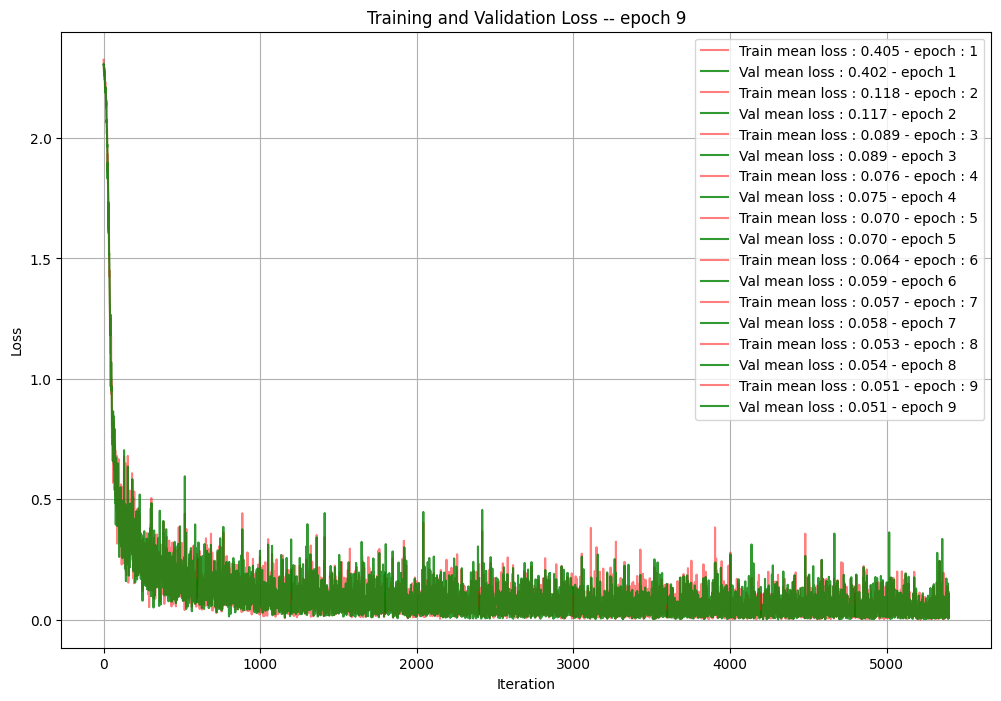

 90%|█████████ | 9/10 [02:22<00:15, 15.98s/it]

In [135]:
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import torch
from tqdm import tqdm

val_samples = int(BATCH_SIZE * 0.3) # 20 images for validation 
train_samples = int(BATCH_SIZE - val_samples) # images for train 

# Setup matplotlib figure outside the loop
plt.figure(figsize=(12, 8))
ax = plt.gca()  # Get the current axis

for e in tqdm(range(num_epochs)):
    val_loss_ = []
    train_loss_ = []
    iter_ = []
    for i, (images, labels) in enumerate(train_loader):
        
        # images -> (100,1,28,28)
        # labels -> (100)
        
        # train set 
        train_images = images[0:train_samples,:,:,:]
        train_labels = labels[0:train_samples]
        #print(train_images.shape, train_labels.shape)
        
        # val set 
        val_images = images[val_samples:,:,:,:]
        val_labels = labels[val_samples:]
        #print(val_images.shape, val_labels.shape)


        # Forward pass on the training set
        pred_labels = model(train_images)
        # Forward pass on the validation set
        with torch.no_grad():
            pred_val_labels = model(val_images)

        # Compute training loss
        train_loss = loss(input=pred_labels, target=train_labels)
        # Compute validation loss
        with torch.no_grad():
            val_loss = loss(input=pred_val_labels, target=val_labels)

        iter_.append(i)
        train_loss_.append(train_loss.item())
        val_loss_.append(val_loss.item())

        # Backward pass and optimize
        train_loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        
        
        
    print(f"\nLoss train epoch mean : {np.mean(train_loss_):.3f}")
    print(f"\nVal epoch mean loss : {np.mean(val_loss_):.3f}")

    # Validation curves
    ax.plot(np.arange(e*len(train_loader),len(train_loader)*(e+1)), train_loss_, 'red', alpha = 0.5, label=f'Train mean loss : {np.mean(train_loss_):.4f} - epoch : {e+1}')
    ax.plot(np.arange(e*len(train_loader),len(train_loader)*(e+1)), val_loss_, 'green', alpha = 0.8, label=f'Val mean loss : {np.mean(val_loss_):.4f} - epoch {e+1}')
    ax.legend()
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Loss')
    ax.set_title(f'Training and Validation Loss -- epoch {e+1}')
    ax.grid(True)
    clear_output(wait=True)
    display(ax.figure)  # Display the figure being updated
        

plt.close()  # Close the plot when the training is done

    

In [ ]:
# Evaluation / metrics 
with torch.no_grad():
    accuracy = 0
    accuracy_2 = 0  
    samples = 0
    for i, (b_images,b_labels) in enumerate(test_loader):
        
        # images -> (100,1,28,28)
        # labels -> (100)
        
        samples += 100
        y_test_pred = model(b_images)
        
        # Segundo metodo accuracy
        _,pred_class_2 = torch.max(y_test_pred ,dim =  1)
        accuracy_2 += (pred_class_2 == b_labels).sum()
        
        # Primer metodo accurcy
        pred_class = y_test_pred.argmax(dim = 1)
        accuracy += torch.sum(pred_class == b_labels)
        print(f"Accuarcy 1 for iter/batch {i} : {torch.sum(pred_class == b_labels)}")
        print(f"Accuarcy 2 for iter/batch {i} : {(pred_class_2 == b_labels).sum()}")


    accuracy = accuracy / samples
    accuracy_2 = accuracy_2 / samples 
    print("Total accuracy 1 :", accuracy.item())
    print("Total accuracy 2:", accuracy_2.item())

Accuarcy 1 for iter/batch 0 : 50
Accuarcy 2 for iter/batch 0 : 50
Accuarcy 1 for iter/batch 1 : 50
Accuarcy 2 for iter/batch 1 : 50
Accuarcy 1 for iter/batch 2 : 50
Accuarcy 2 for iter/batch 2 : 50
Accuarcy 1 for iter/batch 3 : 49
Accuarcy 2 for iter/batch 3 : 49
Accuarcy 1 for iter/batch 4 : 50
Accuarcy 2 for iter/batch 4 : 50
Accuarcy 1 for iter/batch 5 : 49
Accuarcy 2 for iter/batch 5 : 49
Accuarcy 1 for iter/batch 6 : 48
Accuarcy 2 for iter/batch 6 : 48
Accuarcy 1 for iter/batch 7 : 50
Accuarcy 2 for iter/batch 7 : 50
Accuarcy 1 for iter/batch 8 : 46
Accuarcy 2 for iter/batch 8 : 46
Accuarcy 1 for iter/batch 9 : 49
Accuarcy 2 for iter/batch 9 : 49
Accuarcy 1 for iter/batch 10 : 50
Accuarcy 2 for iter/batch 10 : 50
Accuarcy 1 for iter/batch 11 : 48
Accuarcy 2 for iter/batch 11 : 48
Accuarcy 1 for iter/batch 12 : 48
Accuarcy 2 for iter/batch 12 : 48
Accuarcy 1 for iter/batch 13 : 49
Accuarcy 2 for iter/batch 13 : 49
Accuarcy 1 for iter/batch 14 : 48
Accuarcy 2 for iter/batch 14 : 48
